# this is to check effect: (1) Dcross=1.5e-12 and 1.5e-10; (2) De and sigma_e: lansde and con; (3) EC:EMC=3:7

In [1]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [3]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
Target  = 'Revised_Poster/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [4]:
# Define 3 models: normal DFN, single transport by high Dec, double transport
Model_DFN  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "single no consume wo refill",
    "electrolyte conductivity": "full"  ,}) 
""" Model_SD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "full"  ,})  """
Model_DD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "sol full"  ,}) 
Model_All =[ Model_DFN,   Model_DD ]
Str_model =[ 'Model_DFN',   'Model_DD' ]
Para_All = []
for i in range(0,4):
    para=pybamm.ParameterValues("Li2023_ECdrag")
    para.update({"EC initial concentration in electrolyte [mol.m-3]":3500})
    para.update({"Typical EC concentration [mol.m-3]":3500})
    #para.update({"Background solvent concentration [mol.m-3]":7000})
    Para_All.append(para)
# Landesf - high Dx; 
Para_All[0].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_10})
Para_All[0].update({"Cation transference number":electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[0].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[0].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con})
# Landesf - low Dx; 
Para_All[1].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_12})
Para_All[1].update({"Cation transference number":electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[1].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[1].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con})
# Constant - high Dx; 
Para_All[2].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_10})
Para_All[2].update({"Cation transference number":t_0plus_constant})
Para_All[2].update({"Electrolyte conductivity [S.m-1]":cond_constant})
Para_All[2].update({"Electrolyte diffusivity [m2.s-1]":diff_constant})
# Constant - low Dx; 
Para_All[3].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_12})
Para_All[3].update({"Cation transference number":t_0plus_constant})
Para_All[3].update({"Electrolyte conductivity [S.m-1]":cond_constant})
Para_All[3].update({"Electrolyte diffusivity [m2.s-1]":diff_constant})
Str_para = ['Landesf-H Dx', 'Landesf-L Dx', 'Constant-H Dx', 'Constant-L Dx']
var_pts = {
    "x_n": 10,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 10,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}

In [5]:
# all parameter: 2*2*4*2 = 32
TDF_Dis_All = [];Rate_Dis_All = [1,1.5, 2,2.25,2.5 ,2.75, 3, ];  Rate_Cha_All = [1 ];
k=0
for i in range(0,2):
    TDF_i_All = []; para = Para_All[i]; str_para = Str_para[i];
    for model,str_model in zip(Model_All,Str_model):
        TDF_i_All.append(
            Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para,var_pts)
            )
        k += 1
        print(f"Doing {k} scan C rate")
    TDF_Dis_All.append(TDF_i_All)
    del TDF_i_All

At t = 0.00626423 and h = 2.75792e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00132924 and h = 1.9355e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00132924 and h = 7.57388e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00043197 and h = 7.84495e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00043197 and h = 4.13458e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00011947 and h = 1.81899e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00011947 and h = 6.10563e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.13452e-005 and h = 1.4495e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00552241 and h = 1.02743e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00932497 and h = 7.57116e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00439009, , mxstep steps taken before reaching tout.
At t = 0.00214697, , mxstep steps taken before reaching tout.
At t = 0.000352424 and h = 6.9929e-018, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.000352424 and h = 1.80155e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 3.99242e-005 and h = 1.6984e-019, the corrector convergence failed repeatedly or wit

Finish one cycle


At t = 0.000741604 and h = 1.35012e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000741604 and h = 1.66284e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000741604, , mxstep steps taken before reaching tout.
At t = 0.000741604 and h = 1.68061e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000292968 and h = 2.46543e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000292968 and h = 3.91073e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000136718 and h = 9.63032e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.85933e-005 and h = 2.93396e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.95304e-005 and h = 3.67433e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.95308e-005 and h = 4.30163e-018, the corrector convergence failed repeatedly or with |

Finish one cycle


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00825145 and h = 5.75391e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00340619 and h = 3.72178e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00175677 and h = 2.99796e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00175677 and h = 4.29432e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00175677 and h = 3.59851e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000859499 and h = 5.9393e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000410862 and h = 5.17047e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00981925 and h = 9.06871e-023, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00362112 and h = 1.17163e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00362112 and h = 4.37762e-022, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00650003 and h = 1.43579e-023, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle
Finish one cycle
Doing 1 scan C rate


At t = 0.00569204 and h = 9.92684e-027, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000756663 and h = 1.62149e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000756663 and h = 4.26721e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000756663 and h = 2.79153e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00030803 and h = 2.68484e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000308031 and h = 7.73256e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00015178 and h = 5.90014e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 7.36554e-005 and h = 8.1711e-023, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 3.45924e-005 and h = 7.89519e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.50617e-005, , mxstep steps taken before reaching

Finish one cycle


At t = 0.00526463 and h = 9.865e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00823497 and h = 4.42028e-023, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00329965 and h = 1.79145e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00105647 and h = 1.02825e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000159204 and h = 4.51676e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000159204 and h = 2.34053e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000159204 and h = 1.96148e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle
Finish one cycle


At t = 0.00769601 and h = 3.45925e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000999811 and h = 4.81824e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000999812, , mxstep steps taken before reaching tout.
At t = 0.000999812 and h = 5.98536e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00943883 and h = 9.74094e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00459343 and h = 7.98836e-019, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00621504 and h = 1.92588e-019, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle
Finish one cycle
Doing 2 scan C rate


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00626423 and h = 1.82353e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00132924 and h = 2.28086e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00132924 and h = 4.37837e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000431967 and h = 2.04197e-017, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.000431967 and h = 8.45983e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000119467 and h = 2.03228e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0001

Finish one cycle


At t = 0.00552248 and h = 3.22011e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00932618 and h = 5.84733e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00439127 and h = 1.08665e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00214809 and h = 1.19069e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00035355 and h = 2.47861e-021, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00035355 and h = 4.40

Finish one cycle


At t = 0.000741151 and h = 1.5411e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000741151, , mxstep steps taken before reaching tout.
At t = 0.000741151, , mxstep steps taken before reaching tout.
At t = 0.000741151 and h = 7.62288e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000292515, , mxstep steps taken before reaching tout.
At t = 0.000292515 and h = 1.03048e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000136265 and h = 1.26128e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.814e-005 and h = 3.47207e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.90774e-005 and h = 4.47172e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.90776e-005 and h = 6.38661e-022, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00825153 and h = 1.143e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00340632 and h = 3.66823e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0017569 and h = 2.33594e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0017569 and h = 1.47902e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0017569 and h = 4.93143e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000859632 and h = 1.57602e-021, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.000410995, , mxstep steps taken before reaching tout.


Finish one cycle


At t = 0.00981784 and h = 8.66746e-022, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00361746 and h = 4.19731e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00361746 and h = 1.28089e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00649888 and h = 9.75678e-019, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle
Finish one cycle
Doing 3 scan C rate


At t = 0.00584944 and h = 1.15339e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000914471 and h = 8.74601e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000914471, , mxstep steps taken before reaching tout.
At t = 1.72001e-005, , mxstep steps taken before reaching tout.
At t = 1.71997e-005 and h = 7.33291e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.72e-005 and h = 2.35333e-025, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.71998e-005 and h = 7.76487e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.71999e-005 and h = 8.02708e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.71999e-005 and h = 3.46886e-021, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.0054362 and h = 2.70936e-019, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00868243 and h = 2.05329e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00374739 and h = 3.8824e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00150422 and h = 4.42951e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000606944 and h = 2.46666e-022, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.000158309 and h = 1.21459e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000158308 and h = 2.47471e-020, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.000434945 and h = 5.61257e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000434945 and h = 1.61016e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000434945 and h = 2.88052e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000434945 and h = 1.56477e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000434944 and h = 1.33409e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000122445 and h = 2.7881e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000122445 and h = 1.0571e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.43197e-005 and h = 5.82796e-022, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00805309 and h = 2.40677e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00119655 and h = 4.88892e-021, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 0.00119655 and h = 1.5224e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00119655, , mxstep steps taken before reaching tout.


Finish one cycle


At t = 0.00984136 and h = 2.42545e-019, the corrector convergence failed repeatedly or with |h| = hmin.


Finish one cycle


At t = 0.00691275 and h = 8.5698e-023, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00206767 and h = 5.30736e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00206767 and h = 2.56707e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00580201, , mxstep steps taken before reaching tout.


Finish one cycle
Finish one cycle
Doing 4 scan C rate


In [6]:
# Niall's C rate test on fresh cell
Exp_Crate = [0.2, 0.3, 0.4, 0.5, 1, 2, 3]; Exp_Cap = [ 4.815, 4.75, 4.82, 4.82, 4.64, 3.298, 1.983]; 

In [7]:
TDF_Dis_All = [];Rate_Dis_All = [1,1.5, 2,2.25,2.5 ,2.75, 3, ];  Rate_Cha_All = [1 ];

IndexError: list index out of range

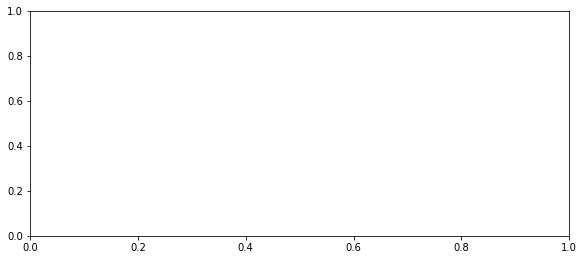

In [8]:
# plot the effect of charge / discharge rate and Dx
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Str=[ 'DFN',   'Double trans' ]; # Str_model =[ 'Model_DFN',   'Model_DD' ]
fig, axs = plt.subplots( figsize=(8, 3.5), layout='constrained')
Colors = ['#1f77b4','#2ca02c',  '#d62728', '#ff7f0e'];
LS = ['-','--'];MS=['none','none','h']; ms = 8
# high Dx: TDF_Dis_All[0]       low Dx: TDF_Dis_All[1]
# single:  TDF_Dis_All[i][0]    double: TDF_Dis_All[i][1]
# single high Dx: TDF_Dis_All[0][0] low Dx: TDF_Dis_All[1][0]     
# double high Dx: TDF_Dis_All[0][1] low Dx: TDF_Dis_All[1][1]     
# high Dx [1]

y_temp = TDF_Dis_All[0][0]['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[0],linestyle=LS[0],label=r"Single") # marker = MS[0], markersize = ms,
y_temp = TDF_Dis_All[1][0]['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
# axs.plot(Rate_Dis_All,y_plt,color=Colors[1],linestyle=LS[1],label=r"Single $D_\times=1.5\bullet10^{-12}  m^2/s$") # marker = MS[1], markerfacecolor='w',markersize = ms, 
y_temp = TDF_Dis_All[1][1]['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[3],linestyle=LS[1], label=r"Double $D_\times=1.5\cdot10^{-12}  \mathrm{m^2/s}$") # marker = MS[1],markerfacecolor='w',markersize = ms,

y_temp = TDF_Dis_All[0][1]['Cap_Dis_All']; y_plt = (1 - y_temp / y_temp[0])*100
axs.plot(Rate_Dis_All,y_plt,color=Colors[2],linestyle=LS[0], label=r"Double $D_\times=1.5\cdot10^{-10}  \mathrm{m^2/s}$") # marker = MS[0], markersize = ms,

# low Dx [0]

""" axs[0].plot(Rate_Cha_All,TDF_Cha_All[0][0]['Cap_Cha_All'],color=Colors[0],linestyle=LS[0],marker = MS[0],label="Single-High Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[1][0]['Cap_Cha_All'],color=Colors[0],linestyle=LS[1],marker = MS[0],label="Single-Low Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[0][1]['Cap_Cha_All'],color=Colors[1],linestyle=LS[0],marker = MS[0],label="Double-High Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[1][1]['Cap_Cha_All'],color=Colors[1],linestyle=LS[1],marker = MS[0],label="Double-Low Dx") """
axs.set_ylabel("Capacity loss %")
axs.set_xlabel("Discharge rate")
axs.set_xlabel("Discharge rate")
#axs.set_ylim(3.9,5.1);   # axs[1].set_ylim(3.9,5.1)

#axs[0].set_title(r"$D_\times=1.5\bullet10^{-12}  m^2/s$", fontdict={'family':'DejaVu Sans','size':fs})
#axs[1].set_title(r"$D_\times=1.5\bullet10^{-10}  m^2/s$", fontdict={'family':'DejaVu Sans','size':fs})
axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False,)
#axs.legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False,)
#plt.savefig(BasicPath + Target+"Fig. 1-Summary Crate.png", dpi=800)

In [ ]:
o=0; 
sol_DFN = TDF_All_All[o][0]['MyDict_All'][3]['Solution']  # Rate_Dis_All = [0.5,2,4,6,8,10]
time_DFN = (sol_DFN.cycles[0].steps[1]['Time [s]'].entries-sol_DFN.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_DD = TDF_All_All[o][2]['MyDict_All'][3]['Solution']  # Rate_Dis_All = [0.5,2,4,6,8,10]
time_DD = (sol_DD.cycles[0].steps[1]['Time [s]'].entries-sol_DD.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()


In [ ]:
t_select = min(time_DFN[-2],time_DD[-2])
print(t_select)
i_DD = time_DD.index(t_select)
i_DF = time_DFN.index(t_select)
print(i_DD,i_DF)
print(time_DD[i_DD],time_DFN[i_DF],)

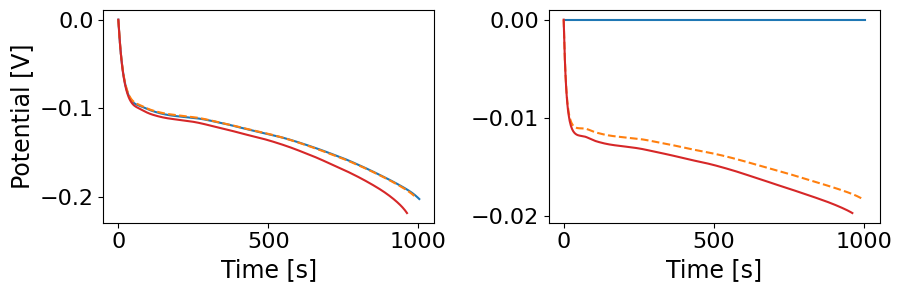

In [ ]:
# for poster: to plot only c_EC and c_Li+ and - 3C discharge only
# single high Dx: TDF_Dis_All[0][0] low Dx: TDF_Dis_All[1][0]     
# double high Dx: TDF_Dis_All[0][1] low Dx: TDF_Dis_All[1][1]   
font = {'family' : 'DejaVu Sans','size'   : 16}
mpl.rc('font', **font)
Crate_index = -1;   
LS = ['-','--','-','--'];
fig, axs = plt.subplots(1,2, figsize=(9.3,3.2),tight_layout=True)

sol = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 

""" sol = TDF_Dis_All[1][0]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[1],label=r"Single-Low $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[1],label=r"Single-Low $D_\times$")  """
sol = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[3],linestyle=LS[3],label=r"Double-Low $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[3],linestyle=LS[3],label=r"Double-Low $D_\times$") 


sol = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[2],linestyle=LS[2],label=r"Double-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[2],linestyle=LS[2],label=r"Double-High $D_\times$") 

axs[0].set_ylabel("Potential [V]",fontsize=fs)
axs[1].set_xlabel("Time [s]",fontsize=fs)
axs[0].set_xlabel("Time [s]",fontsize=fs)
#axs[0].set_ylim(-0.24,0.02); axs[1].set_ylim(-0.24,0.02);
#axs[0].set_xlim(-20,1200); axs[1].set_xlim(-20,1200);
#axs[0].set_xticklabels(np.arange(0,1500,500),fontsize=fs-2)    
#axs[1].set_xticklabels([0,500,1000 ],fontsize=fs-2)    
# axs[0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
#axs[0].set_title(r"Li$^+$ overpotential",fontdict={'family':'DejaVu Sans','size':fs+1})
#axs[1].set_title(r"EC overpotential",fontdict={'family':'DejaVu Sans','size':fs+1})
#plt.savefig(BasicPath + Target+"Fig. 2 - 3C discharge vol decompos.png", dpi=800)

Time selected is 961.9999999999998 and 961.9999999999998,961.9999999999998 ,961.9999999999995 s


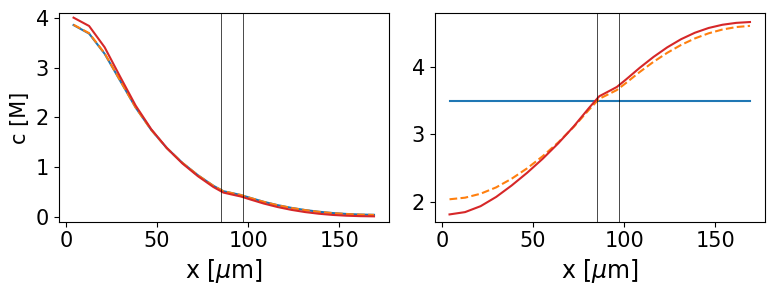

In [ ]:
# compare electrolyte properties: roughly end of 6C discharge, but make it fair
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte concentration [mol.m-3]",
    "EC concentration [mol.m-3]",
]
Title_keys = [
    "c(Li+)",
    "c(EC)",
]
Colors = ['#1f77b4','#2ca02c',  '#d62728', '#ff7f0e']; 
LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Double' ]

Crate_index = -1 # Rate_Dis_All = [0.5,2,4,6,8,10]
sol_Single_High = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
time_Single_High = (sol_Single_High.cycles[0].steps[1]['Time [s]'].entries-sol_Single_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
sol_Double_High = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
time_Double_High = (sol_Double_High.cycles[0].steps[1]['Time [s]'].entries-sol_Double_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Single_Low = TDF_Dis_All[1][0]['MyDict_All'][Crate_index]['Solution']
time_Single_Low = (sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Double_Low = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
time_Double_Low = (sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

t_select = min(time_Single_High[-2],time_Double_High[-2],time_Single_Low[-2],time_Double_Low[-2])
i_Single_High = FindClose(time_Single_High,t_select)
i_Double_High = FindClose(time_Double_High,t_select)
i_Single_Low = FindClose(time_Single_Low,t_select)
i_Double_Low = FindClose(time_Double_Low,t_select)

print(f'Time selected is {time_Single_High[i_Single_High]} and {time_Double_High[i_Double_High]},{time_Single_Low[i_Single_Low]} ,{time_Double_Low[i_Double_Low]} s')

fig, axs = plt.subplots(1,2, figsize=(8,3.2),tight_layout=True)
for i in range(2):
    x_Single_High =   sol_Single_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_High =   sol_Single_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_High]
    x_Single_Low =   sol_Single_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_Low =   sol_Single_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_Low]
    x_Double_High =   sol_Double_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_High =   sol_Double_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_High]
    x_Double_Low =   sol_Double_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_Low =   sol_Double_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_Low]
    axs[i].plot(x_Single_High*1e6, y_Single_High/1e3, color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
    #axs[i].plot(x_Single_Low, y_Single_Low/1e3, color=Colors[1],linestyle=LS[1],label=r"Single-Low $D_\times$") 
    axs[i].plot(x_Double_Low*1e6, y_Double_Low/1e3, color=Colors[3],linestyle=LS[1],label=r"Double-Low $D_\times$") 
    axs[i].plot(x_Double_High*1e6, y_Double_High/1e3, color=Colors[2],linestyle=LS[0],label=r"Double-High $D_\times$") 
    
    #axs[i].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs})
    axs[i].set_xlabel(x_loc[0],   fontdict={'family':'DejaVu Sans','size':fs})
    axs[i].ticklabel_format( 
        axis='x', style='sci',
        scilimits=[-1e3,1e3], useOffset=None, 
        useLocale=None, useMathText=None)
axs[0].set_ylabel("c [M]")
Y_0p = np.arange(-1,6,0.1)
axs[0].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
axs[0].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
axs[1].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
axs[1].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
axs[0].set_xlabel(r"x [$\mu$m]",   fontdict={'family':'DejaVu Sans','size':fs})
axs[1].set_xlabel(r"x [$\mu$m]",   fontdict={'family':'DejaVu Sans','size':fs})
# axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
axs[0].set_ylim([-0.1,4.1])
axs[1].set_ylim([1.7,4.8])

# fig.suptitle(f"3C Discharge, t={round(t_select)} s", fontsize=fs+1)
#plt.savefig(BasicPath +  Target+ f"3C Discharge, t={round(t_select)} s concentration profile.png", dpi=600)  